In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

%matplotlib inline

In [2]:
# Create data for languages skill to visualize later 
languages = pd.DataFrame({
    'Languages': ['R', 'Python', 'SQL', 'JavaScript', 'HTML', 'CSS', 'C'],
    'Skill': [4, 3, 3, 2, 2, 1, 1]
})

In [3]:
# Create data for tools skill
tools = pd.DataFrame({
    'Tools': ['Tableau', 'Highcharts', 'Excel', 'Leaflet', 'Apache Spark',  'SPSS', 'D3'], 
    'Skill': [4, 4, 3, 2, 2, 2, 1]
})


In [4]:
# Create data for favorite tools to complete programming tasks
tasks = {
    'Data Wrangling': ['Python', 'R', 'SQL'],
    'Data Visualization': ['Python', 'R', 'JS'], 
    'Machine Learning': ['Python', 'R'], 
    'NLP': ['Python', 'R'], 
    'Databases': ['Python', 'R', 'SQL'], 
    'Web Programming': ['Python', 'JS', 'HTML', 'CSS'], 
    'Feel Cool': ['JS', 'C']
}

# Create function to convert tasks dictionary to dictionary ready for Pandas DataFrame
def tasksParser(d): 

    """
    A dictionary with keys and uneven list values are input into this function
    A dictionary with even lists of binary values is returned
    Binary 1 means the value was present for the key, and 0 means not present
    """

    allLangs = []
    allUsesLangs = []
    
    testKeys = list(d.keys())

    # Create master list of programming languages 
    for i in range(len(testKeys)):
        langs = d.get(testKeys[i])
        for j in range(len(langs)):
            allLangs.append(langs[j])
    
    uniqueLangs = list(set(allLangs))
    
    # Compare elements of each task-language pair to master list return binary 
    for i in range(len(testKeys)): 
        langs = d.get(testKeys[i])
        
        langSet = list(langs) 
        hasSkill = [x for x in langSet if x in set(allLangs)]   
        usesLang = list(uniqueLangs.copy())
        
        for i in range(len(usesLang)): 
            if usesLang[i] in hasSkill: 
                usesLang[i] = 1
            else:
                usesLang[i] = 0
            
        allUsesLangs.append(usesLang)
            
    # Return dict of binary language use for each task
    masterDict = dict(zip(testKeys, allUsesLangs))
    masterDict['Labels'] = uniqueLangs
    
    return masterDict

                
tasksDF = pd.DataFrame(tasksParser(tasks))
langLabs = tasksDF.pop("Labels")
tasksDF.insert(0, "Labels", langLabs)

# Export CSV to complete chart in Tableau 
tasksDF.to_csv("tasksMatrix.csv",index=False)

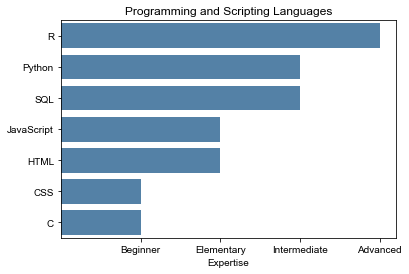

In [5]:
# Create Nominal Scale for Expertise Level
x = [1, 2, 3, 4]
labels = ['Beginner', 'Elementary', 'Intermediate', 'Advanced']

# Create Plot and Styling 
sns.barplot(x = 'Skill', y = 'Languages', data = languages, color = "steelblue")
sns.set_style("whitegrid")
plt.title('Programming and Scripting Languages')
plt.ylabel('')
plt.xlabel('Expertise')
plt.xticks(x, labels)

plt.show()


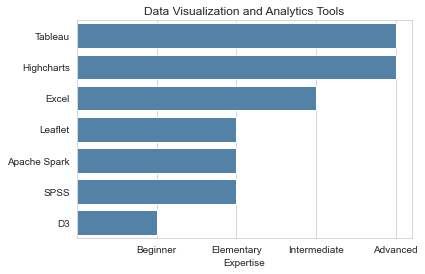

In [6]:
# Create Plot and Styling 
sns.barplot(x = 'Skill', y = 'Tools', data = tools, color = "steelblue")
sns.set_style("whitegrid")
plt.title('Data Visualization and Analytics Tools')
plt.ylabel('')
plt.xlabel('Expertise')
plt.xticks(x, labels)

plt.show()

In [7]:
# Use Google Trends to find popularity of "Data Storytelling"
pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["Data Storytelling"]
pytrends.build_payload(kw_list, cat = 0, timeframe='today 5-y', geo='', gprop='')

dataStory = pytrends.interest_over_time()
dataStory.reset_index(inplace = True)
dataStory = dataStory.drop(columns=['isPartial'])

In [8]:
# The trend is pretty messy. Overlay a linear regression line on the data to show human-friendly trend. 
from sklearn.linear_model import LinearRegression
import datetime as dt

In [9]:
# Fit simple linear regression model

x = pd.DataFrame(dataStory['date'].map(dt.datetime.toordinal))
y = pd.DataFrame(dataStory['Data Storytelling'])

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('Predictive Power:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

y_pred = model.predict(x)

dataStory['Pred'] = y_pred

dataStory.head(5)

Predictive Power: 0.44928742892253326
Intercept: [-18219.55512269]
Slope: [[0.02478848]]


,date,Data Storytelling,Pred
0,2015-12-06,24,23.227925
1,2015-12-13,19,23.401445
2,2015-12-20,11,23.574964
3,2015-12-27,11,23.748484
4,2016-01-03,30,23.922003


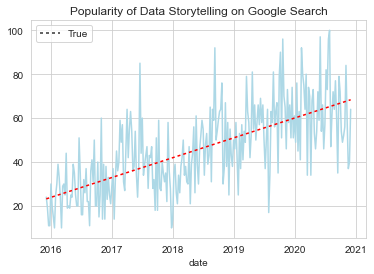

In [10]:
# Overlay regression on Google Trends data 
sns.lineplot(x = "date", y = "Data Storytelling", data = dataStory, color = "lightblue")
sns.lineplot(x = "date", y = "Pred", data = dataStory, color = "red", style=True, dashes=[(2,2)])
sns.set_style("whitegrid")
plt.title('Popularity of Data Storytelling on Google Search')
plt.ylabel('')
plt.savefig('GoogleTrends.png')

plt.show()

In [11]:
googleDataJSON = dataStory.to_json(orient = "split", index = False)
